In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [2]:
test = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\test.csv')
train = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\train.csv')

ss =pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\sample_submission.csv')

In [3]:
tr_labels = train.iloc[::,:1]
train = train.iloc[::,1:]

In [4]:
scaler = MinMaxScaler(feature_range=[0, 1])
train_rescaled = scaler.fit_transform(train)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


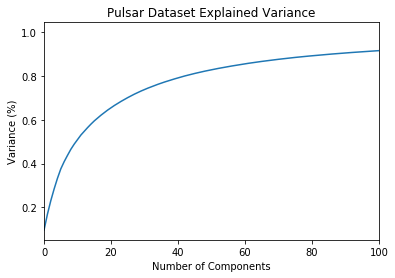

In [5]:
pca = PCA().fit(train_rescaled)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.xlim(0,100)
plt.title('Pulsar Dataset Explained Variance')
plt.show()

simple Regression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train,tr_labels,test_size=0.2,random_state=932)

In [8]:
model = Sequential()
n_cols = train.shape[1]
model.add(Dense(280,activation='relu',input_shape = (n_cols,)))
model.add(Dense(120,activation='relu',input_shape = (n_cols,)))
#model.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=10)

In [9]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train,tr_labels,validation_split = 0.2,epochs=400,callbacks=[early_stopping_monitor],batch_size=90)

Train on 33600 samples, validate on 8400 samples
Epoch 1/400
33600/33600 [==============================] - 6s 192us/step - loss: 142.4157 - val_loss: 5.0373
Epoch 2/400
33600/33600 [==============================] - 6s 180us/step - loss: 3.7078 - val_loss: 3.0550
Epoch 3/400
33600/33600 [==============================] - 6s 167us/step - loss: 2.6206 - val_loss: 2.4642
Epoch 4/400
33600/33600 [==============================] - 6s 169us/step - loss: 2.1535 - val_loss: 2.1287
Epoch 5/400
33600/33600 [==============================] - 5s 152us/step - loss: 1.8389 - val_loss: 1.9027
Epoch 6/400
33600/33600 [==============================] - 5s 157us/step - loss: 1.6316 - val_loss: 1.8350
Epoch 7/400
33600/33600 [==============================] - 5s 159us/step - loss: 1.4609 - val_loss: 1.6297
Epoch 8/400
33600/33600 [==============================] - 6s 176us/step - loss: 1.3246 - val_loss: 1.5451
Epoch 9/400
33600/33600 [==============================] - 6s 166us/step - loss: 1.2301 - val

33600/33600 [==============================] - 5s 161us/step - loss: 0.0627 - val_loss: 0.5329
Epoch 77/400
33600/33600 [==============================] - 6s 171us/step - loss: 0.0552 - val_loss: 0.5090
Epoch 78/400
33600/33600 [==============================] - 6s 170us/step - loss: 0.0656 - val_loss: 0.5100
Epoch 79/400
33600/33600 [==============================] - 6s 165us/step - loss: 0.0688 - val_loss: 0.5079
Epoch 80/400
33600/33600 [==============================] - 6s 170us/step - loss: 0.0548 - val_loss: 0.5195
Epoch 81/400
33600/33600 [==============================] - 6s 170us/step - loss: 0.0500 - val_loss: 0.5245
Epoch 82/400
33600/33600 [==============================] - 6s 166us/step - loss: 0.0537 - val_loss: 0.5056
Epoch 83/400
33600/33600 [==============================] - 6s 168us/step - loss: 0.0417 - val_loss: 0.5071
Epoch 84/400
33600/33600 [==============================] - 6s 165us/step - loss: 0.0494 - val_loss: 0.4981
Epoch 85/400
33600/33600 [===============

In [10]:
model8020 = model.predict(test)

In [11]:
x = pd.DataFrame(model8020, columns = {"Label"})

In [12]:
x.Label = x.Label.astype(int)

In [13]:
x.Label.value_counts()

 1     4438
 7     3137
 5     3088
 3     3087
 4     3002
 0     2656
 2     2644
 8     2452
 6     1968
 9     1504
 10      21
-1        3
Name: Label, dtype: int64

In [14]:
for i in range(0,28000):
    if x.Label[i] == 10:
        x.Label[i] = 9
        

In [15]:
x.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\model8020.csv')

In [17]:
x

,Label
0,1
1,0
2,7
3,2
4,2
5,7
6,0
7,2
8,0
9,2


In [18]:
x.A = x.Label.astype(int)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [19]:
x.index += 1

In [ ]:
x

In [20]:
x.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\model8020.csv')

Model SoftMax

In [21]:
tr_labels

,label
0,1
1,0
2,1
3,4
4,0
5,0
6,7
7,3
8,5
9,3


In [22]:
tr_labels_dummy = pd.get_dummies(tr_labels.astype(str))

In [23]:
model_soft = Sequential()
n_cols = train.shape[1]
model_soft.add(Dense(40,activation='relu',input_shape = (n_cols,)))
model_soft.add(Dense(25,activation='relu'))
model_soft.add(Dense(10,activation='softmax'))
#model.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=10)

In [24]:
model_soft.compile(optimizer='adam',loss='categorical_crossentropy')
model_soft.fit(train_rescaled,tr_labels_dummy,validation_split = 0.2,epochs=200,callbacks=[early_stopping_monitor],batch_size=90)

Train on 33600 samples, validate on 8400 samples
Epoch 1/200
33600/33600 [==============================] - 2s 53us/step - loss: 0.6003 - val_loss: 0.2814
Epoch 2/200
33600/33600 [==============================] - 1s 42us/step - loss: 0.2406 - val_loss: 0.2095
Epoch 3/200
33600/33600 [==============================] - 2s 46us/step - loss: 0.1876 - val_loss: 0.1740
Epoch 4/200
33600/33600 [==============================] - 1s 42us/step - loss: 0.1543 - val_loss: 0.1605
Epoch 5/200
33600/33600 [==============================] - 2s 46us/step - loss: 0.1327 - val_loss: 0.1524
Epoch 6/200
33600/33600 [==============================] - 1s 43us/step - loss: 0.1177 - val_loss: 0.1403
Epoch 7/200
33600/33600 [==============================] - 2s 49us/step - loss: 0.1040 - val_loss: 0.1367
Epoch 8/200
33600/33600 [==============================] - 1s 44us/step - loss: 0.0937 - val_loss: 0.1367
Epoch 9/200
33600/33600 [==============================] - 2s 56us/step - loss: 0.0846 - val_loss: 0.13

In [25]:
model2812soft = model_soft.predict(test)

In [26]:
y = pd.DataFrame(model4525softscaled)

NameError: name 'model4525softscaled' is not defined

In [ ]:
l = []

In [ ]:
for i in range(28000): 
    for j in range(10):
        if y[j][i] == y.iloc[i,::].max():
            l.append(j)

In [88]:
l

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 7,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 7,
 0,
 3,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 5,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 3,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 2,
 1,
 2,
 4,
 7,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 8,


In [52]:
y[3].max()

1.0

In [89]:
z = pd.DataFrame(l)

In [71]:
y

,0,1,2,3,4,5,6,7,8,9
0,1.667349e-05,1.527719e-06,9.998343e-01,3.000472e-09,5.294312e-13,7.700920e-08,1.471671e-04,8.140637e-08,4.693624e-09,2.651488e-26
1,1.000000e+00,0.000000e+00,2.302147e-17,0.000000e+00,0.000000e+00,8.815891e-22,2.622443e-17,1.403192e-29,9.283980e-38,0.000000e+00
2,3.899918e-03,1.645694e-03,1.819695e-03,2.613848e-03,5.008845e-03,1.036613e-03,1.191497e-03,4.592360e-03,2.656593e-02,9.516256e-01
3,5.782100e-02,4.032671e-02,1.352211e-01,3.111987e-02,8.184861e-02,9.129699e-03,2.526428e-02,1.670959e-01,9.834320e-02,3.538297e-01
4,4.442195e-09,2.127488e-03,1.303047e-05,9.969181e-01,2.084089e-16,7.873499e-04,5.238748e-13,6.064935e-08,1.538480e-04,5.927305e-10
5,3.468451e-03,1.441380e-03,2.945123e-03,1.725853e-03,1.649034e-02,5.963672e-04,1.094545e-03,1.343818e-02,1.062320e-02,9.481766e-01
6,1.000000e+00,0.000000e+00,6.613750e-11,0.000000e+00,3.986992e-31,2.296063e-22,4.735246e-17,2.058702e-16,1.271526e-18,0.000000e+00
7,2.291096e-11,2.472552e-04,2.502763e-07,9.995874e-01,2.161047e-19,1.526302e-04,1.612229e-16,3.255922e-09,1.249662e-05,3.069583e-10
8,1.000000e+00,0.000000e+00,3.117343e-24,0.000000e+00,0.000000e+00,2.586936e-29,4.485007e-30,0.000000e+00,0.000000e+00,0.000000e+00
9,1.874567e-19,1.660333e-17,1.945487e-11,9.999999e-01,6.387304e-31,1.144160e-07,1.251767e-30,5.247944e-12,9.167322e-14,3.528728e-13


In [92]:
z.index += 2

In [77]:
z

,0
1,2
2,0
3,9
4,9
5,3
6,9
7,0
8,3
9,0
10,3


In [93]:
z.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\model4520softscaled.csv')

In [37]:
for i in range(0,28000):
    y[0][i] = max(y[0][i],y[1][i],y[2][i],y[3][i],y[4][i],y[5][i],y[6][i],y[7][i],y[8][i])
        

In [ ]:
for i in range(0,28000):
    if x.A[i] == 12:
        x.A[i] = 4
        

In [49]:
y

,0,1,2,3,4,5,6,7,8,9
0,1.667349e-05,1.527719e-06,9.998343e-01,3.000472e-09,5.294312e-13,7.700920e-08,1.471671e-04,8.140637e-08,4.693624e-09,2.651488e-26
1,1.000000e+00,0.000000e+00,2.302147e-17,0.000000e+00,0.000000e+00,8.815891e-22,2.622443e-17,1.403192e-29,9.283980e-38,0.000000e+00
2,3.899918e-03,1.645694e-03,1.819695e-03,2.613848e-03,5.008845e-03,1.036613e-03,1.191497e-03,4.592360e-03,2.656593e-02,9.516256e-01
3,5.782100e-02,4.032671e-02,1.352211e-01,3.111987e-02,8.184861e-02,9.129699e-03,2.526428e-02,1.670959e-01,9.834320e-02,3.538297e-01
4,4.442195e-09,2.127488e-03,1.303047e-05,9.969181e-01,2.084089e-16,7.873499e-04,5.238748e-13,6.064935e-08,1.538480e-04,5.927305e-10
5,3.468451e-03,1.441380e-03,2.945123e-03,1.725853e-03,1.649034e-02,5.963672e-04,1.094545e-03,1.343818e-02,1.062320e-02,9.481766e-01
6,1.000000e+00,0.000000e+00,6.613750e-11,0.000000e+00,3.986992e-31,2.296063e-22,4.735246e-17,2.058702e-16,1.271526e-18,0.000000e+00
7,2.291096e-11,2.472552e-04,2.502763e-07,9.995874e-01,2.161047e-19,1.526302e-04,1.612229e-16,3.255922e-09,1.249662e-05,3.069583e-10
8,1.000000e+00,0.000000e+00,3.117343e-24,0.000000e+00,0.000000e+00,2.586936e-29,4.485007e-30,0.000000e+00,0.000000e+00,0.000000e+00
9,1.874567e-19,1.660333e-17,1.945487e-11,9.999999e-01,6.387304e-31,1.144160e-07,1.251767e-30,5.247944e-12,9.167322e-14,3.528728e-13


In [83]:
model4525softscaled = model_soft.predict(test)

In [ ]:
x.A.value_counts()

In [ ]:
y = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\model8020.csv')

In [ ]:
y['ImageId'] = y['ImageId'].apply(lambda x : x+1)

In [ ]:
y = y.iloc[::,1:]

In [ ]:
y

In [ ]:
y.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\model8020.csv')

In [ ]:
y.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\digit-recognizer\model80202.csv')